In [9]:
# Example A:
#  • We are going to use 2 layers
#  • optimizer we are going to use SGD
#  • We are going to use without Normalization

# Example B:
#  • We are going to use 3 layers
#  • optimizer we are going to use Adam
#  • We are going to use without Normalization

# Example C:
#  • We are going to use 2 layers
#  • optimizer we are going to use SGD
#  • We are going to use with Normalization and standardization

In [39]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [2]:
insurance_data=pd.read_csv('/content/insurance_data.csv')
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
insurance_data_one_hot=pd.get_dummies(insurance_data)
insurance_data_one_hot.head(10)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,True,False,False
5,31,25.740,0,3756.62160,True,False,True,False,False,True,False


In [4]:
X=insurance_data_one_hot.drop('charges',axis=1)
y=insurance_data_one_hot['charges']
#kita buang charges dari kolum

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,True
1,18,33.770,1,False,True,True,False,False,True,False
2,28,33.000,3,False,True,True,False,False,True,False
3,33,22.705,0,False,True,True,False,True,False,False
4,32,28.880,0,False,True,True,False,True,False,False


In [6]:
print('charges')
y.head()

charges


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
tf.random.set_seed(42)
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

In [17]:
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

In [18]:
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step - loss: 8512.9355 - mae: 8512.9355
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 8511.2490 - mae: 8511.2490
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 8508.0488 - mae: 8508.0488
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 8501.7051 - mae: 8501.7051
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 8489.0254 - mae: 8489.0254
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 8463.6416 - mae: 8463.6416
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 8412.8027 - mae: 8412.8027
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 8310.9678 - mae: 8310.9678
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 8106.9707 - mae: 8106.9707
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 7698.3140 - mae: 7698.3140
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 6879.6602 - mae: 6879.6602
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss:

In [19]:
insurance_model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 7796.7188 - mae: 7796.7188


[7796.71875, 7796.71875]

In [14]:
# Example B

In [33]:
tf.random.set_seed(42)
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

history_model2=insurance_model_2.fit(X_train,y_train,epochs=200,verbose=0)

In [34]:
insurance_model_2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 7823.2783 - mae: 7823.2783


[7823.2783203125, 7823.2783203125]

In [35]:
insurance_model_2_loss,insurance_model_2_mae=insurance_model_2.evaluate(X_test,y_test)
print("Loss:", insurance_model_2_loss)
print("MAE:", insurance_model_2_mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7823.2783 - mae: 7823.2783
Loss: 7823.2783203125
MAE: 7823.2783203125


Text(0.5, 1.0, 'Loss vs Epochs')

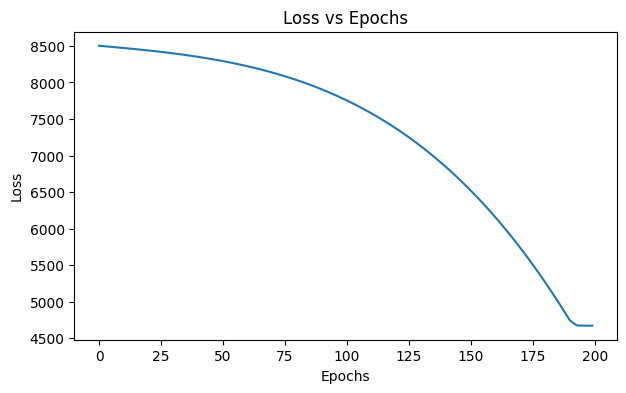

In [36]:
plt.figure(figsize=(7,4))
plt.plot(history_model2.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

In [ ]:
#Example 3

In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [42]:
insurance_data=pd.read_csv('/content/insurance_data.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'),["sex","smoker","region"])
)

In [45]:
X=insurance_data.drop('charges',axis=1)
y=insurance_data['charges']
#

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [48]:
X_train_normal=ct.fit_transform(X_train)
X_test_normal=ct.transform(X_test)

In [49]:
#Original data
X_train

,age,sex,bmi,children,smoker,region
5,31,female,25.740,0,no,southeast
2,28,male,33.000,3,no,southeast
4,32,male,28.880,0,no,northwest
3,33,male,22.705,0,no,northwest


In [50]:
# Normalized data
X_train_normal

array([[0.6       , 0.2948033 , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        ],
       [0.8       , 0.59980573, 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 1.        , 0.        ]])

In [51]:
print("X_train Shape",X_train.shape)
print("X_train_normal Shape",X_train_normal.shape)


X_train Shape (4, 6)
X_train_normal Shape (4, 8)


In [56]:
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

model3_history=model3.fit(X_train_normal,y_train,epochs=200,verbose=0)

In [57]:
model3_evaluate=model3.evaluate(X_test_normal,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 9151.9961 - mae: 9151.9961
